In [26]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [27]:
# Чтение датасета из файла
df = pd.read_csv('S02-hw-dataset.csv')

In [28]:
# Вывод первых 10 строк датасета
df.head(n=10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [29]:
# Информация о количестве и типе данных в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [30]:
# Описание численных значений датасета по столбцам
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [31]:
# Доля пропусков по столбцам
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [32]:
# Количество дубликатов
df.duplicated().sum()

1

In [33]:
df[(df['age'] > 100) | (df['age'] < 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [34]:
df[(df['purchases'] < 0) | (df['revenue'] < 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [35]:
df[(df['purchases'] > 0) & (df['revenue'] == 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


При проверке данных были обнаружены следующие аномалии: один пользователь с очень большим возрастом (120 лет), у этого же пользователя отрицательное количество покупок, а также есть пользователь, у которого нулевой доход при ненулевых покупках

In [36]:
# Количество пользоваелей по странам
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [37]:
# Средние значения возраста, покупок и дохода по странам
df.groupby('country').mean()

,user_id,age,purchases,revenue
country,,,,
CN,10.000000,24.000000,4.500000,1054.000000
DE,24.666667,34.600000,6.500000,1445.500000
FR,20.666667,46.250000,4.250000,675.916667
RU,18.076923,30.076923,4.769231,790.076923
US,22.375000,36.714286,4.625000,557.375000


Большинство пользователей из России и Франции; из-за того, что 120летний пользователь из Франции, средний возраст по этой стране сильно выделяется

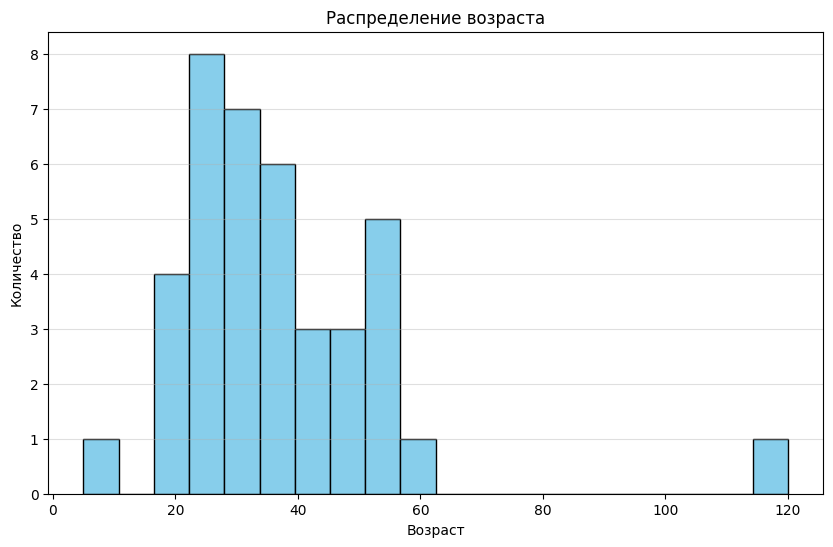

In [38]:
# График распредления возраста
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(axis='y', alpha=0.4)
plt.show()

C:\Users\rafee\AppData\Local\Temp\ipykernel_18332\3167083258.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(revenue_data, labels=countries)


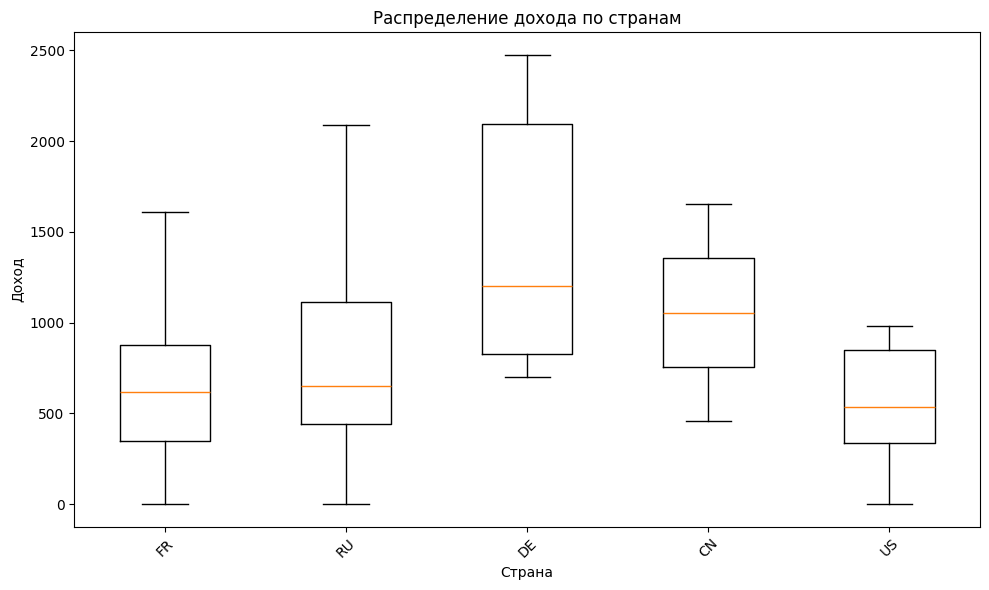

In [39]:
# Боксплот, показывающий распределение дохода по странам
plt.figure(figsize=(10, 6))
countries = df['country'].unique()
revenue_data = [df[df['country'] == country]['revenue'].dropna().values for country in countries]

plt.boxplot(revenue_data, labels=countries)
plt.title('Распределение дохода по странам')
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

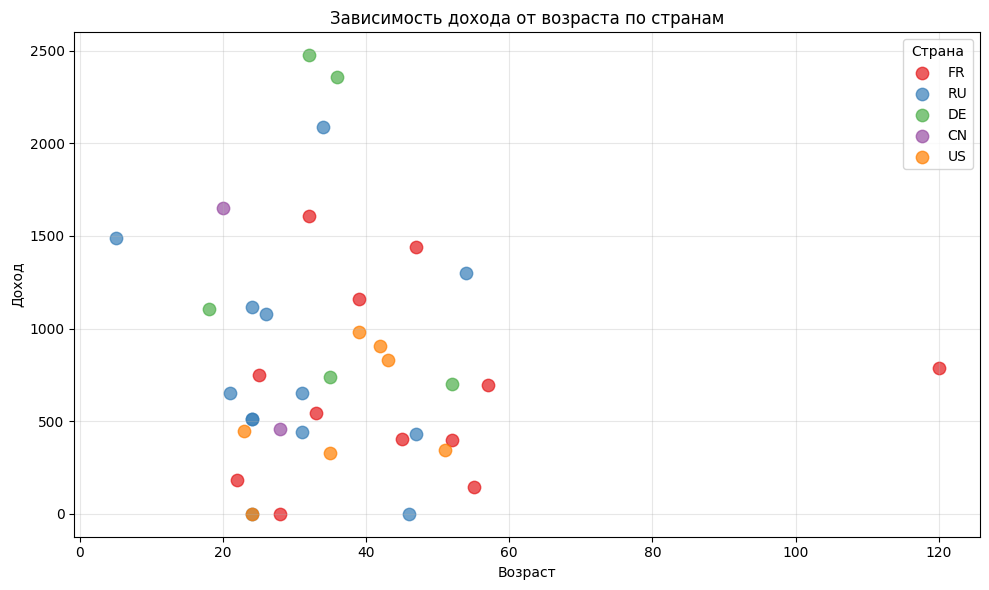

In [ ]:
# Распредение дохода по возрасту (с выделением стран цветом)
countries = df['country'].unique()
plt.figure(figsize=(10, 6))
colors = plt.cm.Set1(range(len(countries))) 

for i, country in enumerate(countries):
    subset = df[df['country'] == country]
    plt.scatter(subset['age'], subset['revenue'], 
                label=country, 
                color=colors[i], 
                alpha=0.7, 
                s=80)

plt.title('Зависимость дохода от возраста по странам')
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.legend(title='Страна') 
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/scatter_age_vs_revenue.png', bbox_inches='tight') # сохраняем график
plt.show()